# Mini-Project "Heart Disease" part I: EDA

As per CDC.gov "Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups
in the United States.One person dies every 37 seconds in the United States from cardiovascular disease.
About 647,000 Americans die from heart disease each year—that’s 1 in every 4 deaths."
Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis.  

In this article, I will be applying Explotatory Data Analysis approaches to understand relation between each factors/attributes of a person to his/her suffering from heart disease or not .
Dataset used in this notebook I made to explore a heart is available here: https://www.kaggle.com/ronitf/heart-disease-uci and also on my gitHub


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# load the dataset
main_data = pd.read_csv("heart.csv")
main_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data = main_data.copy()

### Correcting Values 

In [4]:
main_data['sex'] = main_data['sex'].replace(1,"Male")
main_data['sex'] = main_data['sex'].replace(0,"Female")
main_data['target'] = main_data['target'].replace(1,"No Heart Disease")
main_data['target'] = main_data['target'].replace(0," Heart Disease")

### Understanding the Data dynamics

In [5]:
main_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Heart Disease
freq,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165
mean,54.366337,NaN,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,NaN
std,9.082101,NaN,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,NaN
min,29.000000,NaN,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,47.500000,NaN,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,NaN
50%,55.000000,NaN,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,NaN
75%,61.000000,NaN,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,NaN


In [6]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null object
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


### Data Issues and Corrections 

In [7]:
#Detecting Null Values
main_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

None of the 14 attributes of the dataset has Null Values.

In [8]:
main_data[main_data.notnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,No Heart Disease
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,No Heart Disease
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,No Heart Disease
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,No Heart Disease
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,Heart Disease
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,Heart Disease
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,Heart Disease
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,Heart Disease


"Not null" command returned the original data shape, so its clear that there are no missing values in the data.

In [9]:
main_data.shape

(303, 14)

In [10]:
#find Duplicate Data
data_duplicate = main_data[main_data.duplicated()].copy()
data_duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,Male,2,138,175,0,1,173,0,0.0,2,4,2,No Heart Disease


In [11]:
# Drop the duplicate row
dup_data = main_data.drop_duplicates()
print(dup_data.shape)
print(main_data.shape)

(302, 14)
(303, 14)


Only one Duplicate value found and dropped from the data.

In [12]:
#InterQuartileRange Method to find Outliers
Q1 = dup_data.quantile(0.25)
Q3 = dup_data.quantile(0.75)
IQR = Q3 - Q1
data_outliers = dup_data[~((dup_data < (Q1 - 1.5 * IQR)) |(dup_data > (Q3 + 1.5 * IQR)))]
count_outliers = dup_data.count() - data_outliers.count()
print(count_outliers)


age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          24
thal         2
target       0
dtype: int64


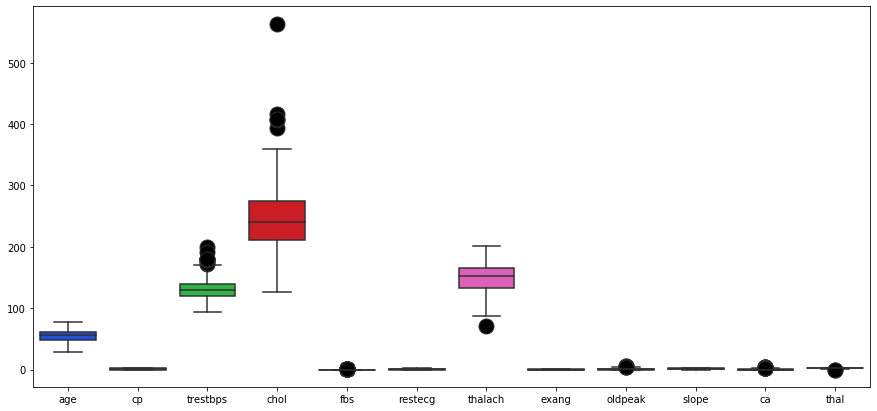

In [13]:
#Outliers with visualization tool
plt.figure(figsize=(15,7))
black_circle = dict(markerfacecolor='k', marker='o')
ax = sns.boxplot(data= dup_data,palette = "bright", fliersize =15, flierprops =black_circle)

Above plot shows one extreme outliers in column "chol" is more than 500 units, almost double the mean.This wil have a disproportionate effect on statistical results, followed by misleading interpretations. Whereas in Thalach there is one outlier with the value of 71.if the value is removed from the dataset, it brings 0.27units difference in the Mean value. Similarly, in trestbps column , resting blood pressure of a patient has few outliers. They effect the mean value by 0.65 units. 
There are few other visibile outliers in ca,oldpeak,thal.Both ca and thal can be catogerised. Value of the column should not hugely deviate the prediction. Most of the outliers found in fbs,oldpeak,ca,thal are near the max value for the respective columns. 
Sex and target columns are not included in the plot as both have boolean values. 


In [14]:
# to find the number of outliers and to drop from the data
y = dup_data['chol']
removed_outliers = y > y.quantile(.98)
print(removed_outliers.value_counts())

False    295
True       7
Name: chol, dtype: int64


In [15]:
dup_data.loc[dup_data["chol"]>= 400] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,Female,2,140,417,1,0,157,0,0.8,2,1,2,No Heart Disease
85,67,Female,2,115,564,0,0,160,0,1.6,1,0,3,No Heart Disease
220,63,Female,0,150,407,0,0,154,0,4.0,1,3,3,Heart Disease
246,56,Female,0,134,409,0,0,150,1,1.9,1,2,3,Heart Disease


In [16]:
# Drop 2 outliers from the main data and understand the effect on mean value.
sort_data = dup_data.sort_values(by=['chol'])
#sort_data.tail()
drop_data = sort_data.iloc[:-2]
#print(drop_data)


In [17]:
drop_data.loc[drop_data["chol"]>= 400] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
220,63,Female,0,150,407,0,0,154,0,4.0,1,3,3,Heart Disease
246,56,Female,0,134,409,0,0,150,1,1.9,1,2,3,Heart Disease


In [18]:
print(drop_data.shape)
print(dup_data.shape)

(300, 14)
(302, 14)


In [19]:
print("drop_data['chol'].mean=",drop_data['chol'].mean())
print("dup_data['chol'].mean=",dup_data['chol'].mean())
print("drop_data['chol'].median=",drop_data['chol'].median())
print("dup_data['chol'].median=",dup_data['chol'].median())

drop_data['chol'].mean= 244.87333333333333
dup_data['chol'].mean= 246.5
drop_data['chol'].median= 240.0
dup_data['chol'].median= 240.5


It should be noted that outliers did not have a significant affect on the mean and median. I have created a dummy dataset excluding the highest 2 outliers.<br>If we check the data below, it clearly states that both female are above 60 yrs of age. Also, their health record shows they were unhealthy. Blood pressure, cholestrol, heart rate all are way above normal range, yet they did not suffer from heart related disease. There should be some discrepancies in the data. As its not clear where the error was made, i have continued using the dataset "dup_data, ehich only excludes duplicate entry.This can also avoid overfitting of the model.<br>
- 1. 65	Female	2	140	417	1	0	157	0	0.8	2	1	2	No Heart Disease<br>
- 2. 67	Female	2	115	564	0	0	160	0	1.6	1	0	3	No Heart Disease

### Data Visualizations

In [20]:
dup_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,No Heart Disease
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,No Heart Disease
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,No Heart Disease
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,No Heart Disease
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,No Heart Disease


Text(0.5, 1, 'Heatmap for the Dataset')

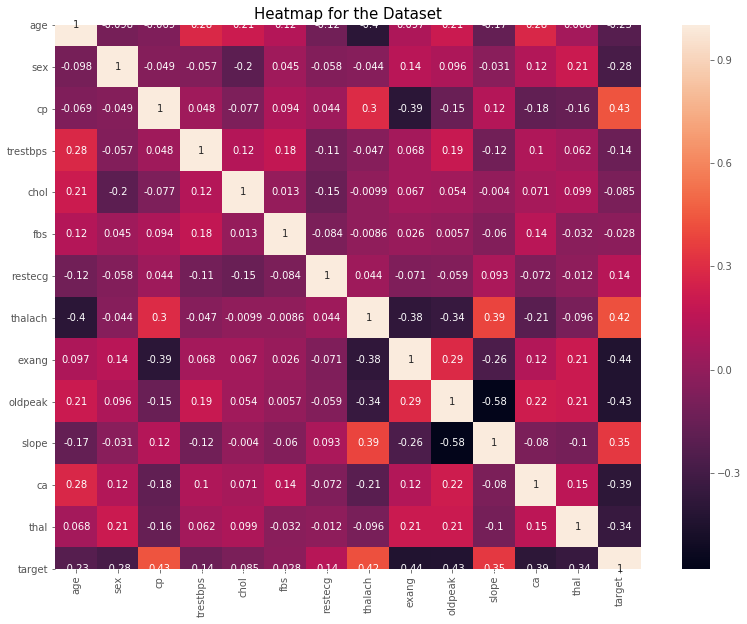

In [21]:
#correlation Heatmap
plt.figure(figsize=(15,10))
correlations = data.corr()
plt.style.use('ggplot')
g =sns.heatmap(correlations, vmax=1, square=True,annot=True,yticklabels=True)
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Heatmap for the Dataset', fontsize = 15)

The above heat map is to show the magnitude of each attributes of the given dataset. The heat map shows that almost all of the features/attributes given in the dataset are very less correlated with each other.The heat map also shows the correlation of each feature with "Target".The color gradient scale on the right of the map shows the correlation factor of each feature. The same can be seen via the numbers on the heat map. 1 indicates a high correlation and 0 indicates no correlation.

Three features show a good correlation to the Target feature: cp(0.43), thalach(.42), slope(0.35).The color map also indicates the same correlation.

Thalach is the only feature which is correlated with another 2 variables, cp and slope.This implies we must include most of the features.Thalach, can be dropped as there is high correlation of two or more features(to eliminate redundancy).


Text(0.5, 1.0, 'Correlation of Each Attribute with Target ')

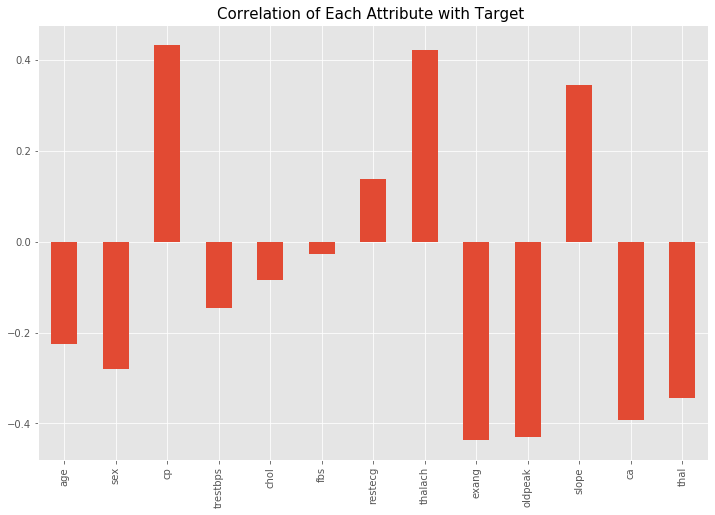

In [22]:

data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8))
plt.title('Correlation of Each Attribute with Target ',fontsize = 15)


Image above can be clearly used to summarize the relationship between variables and target. There is positive correlation with cp, restecg,thalach, slope with respect to target. We can choose to drop exang and oldpeak features while further evaluating as it has very high negative correlation with target.

sex     target          
Female  No Heart Disease     72
         Heart Disease       24
Male     Heart Disease      114
        No Heart Disease     92
Name: target, dtype: int64

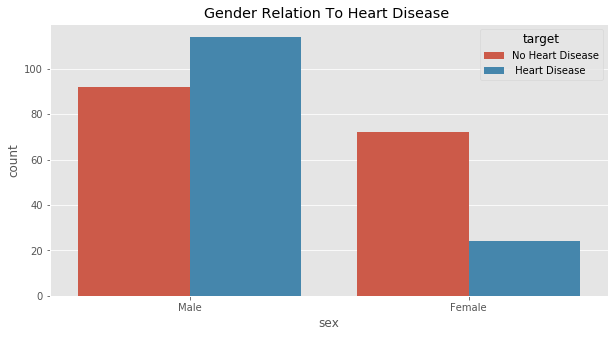

In [31]:
#break target out by sex
plt.figure(figsize=(10,5))
sns.countplot(x="sex", hue="target", data=dup_data)
plt.title('Gender Relation To Heart Disease ')
dup_data.groupby('sex')['target'].value_counts()

By looking at the plot, we can infer that Males are highly likely to suffer from heart diseases in comparison to females. 55% of men in the study had heart disease compared to the 45% with no heart disease, whereas only 25% of women had heart disease in comparison to the 75% who do not have heart disease. 

In this dataset 68% of the patients are men(207) whereas only 32% are women(96). We can conclude that more number of men participated in heart disease check ups.

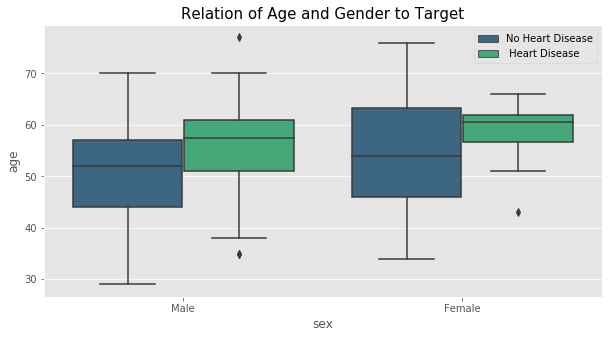

In [24]:
# Heart Disease based on Age and Sex Both
plt.figure(figsize=(10,5))
plt.title('Relation of Age and Gender to Target', fontsize = 15)
sns.boxplot(dup_data['sex'], dup_data['age'],hue = dup_data['target'], palette = 'viridis')
plt.legend(loc='best')
plt.show()

For men, the risk starts to climb at about age 50, it continues to increase until, by age 75 .For women, the risk of heart disease also climbs with age, but the trend begins around 60 years. Irrespective of gender adults above 60 are likely to suffer from heart disease. Median for both male and female with no heart disease is around 53,whereas for patients with heart disease is not similar. 

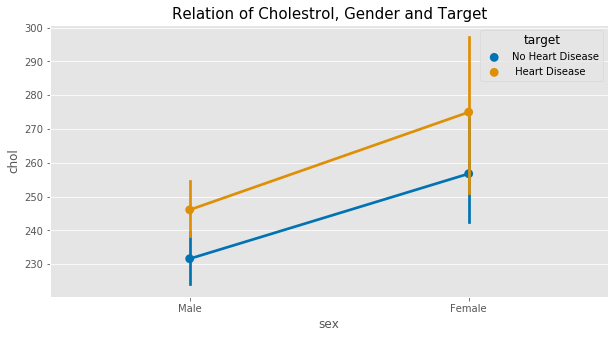

In [25]:
# Cholestrol relation to Heart disease, genderwise
plt.figure(figsize=(10,5))
plt.title('Relation of Cholestrol, Gender and Target', fontsize = 15)
sns.pointplot(dup_data['sex'],dup_data['chol'], hue =dup_data['target'], palette = 'colorblind')
plt.show()

Females with heart disease have high cholestrol when compared to male patients.Cholesterol levels around 220 is generally considered safe. Healthy males fall in this group.Clearly, High blood cholesterol is a major women's health issue.

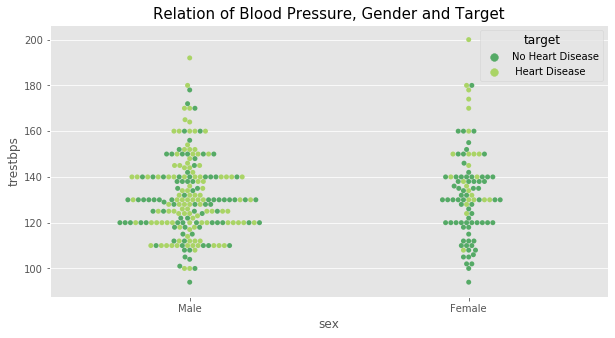

In [26]:
# Blood Pressure relation to Heart disease, genderwise
plt.figure(figsize=(10,5))
plt.title('Relation of Blood Pressure, Gender and Target', fontsize = 15)
sns.swarmplot(x="sex", y="trestbps", hue="target", data=dup_data,palette = 'summer')
plt.show()

The aggregated resting blood pressure for the entire cohort exhibited a median value of 140 mm Hg which was similar to both male and female group. The distribution of resting blood pressure values were slightly larger for the diseased compared to the non-diseased group. Males with heart disease have blood pressure as low as 100 mm Hg, so resting blood pressure will not be a good predictive feature.


Text(0.5, 1.0, 'Fbs Relation To Heart Disease ')

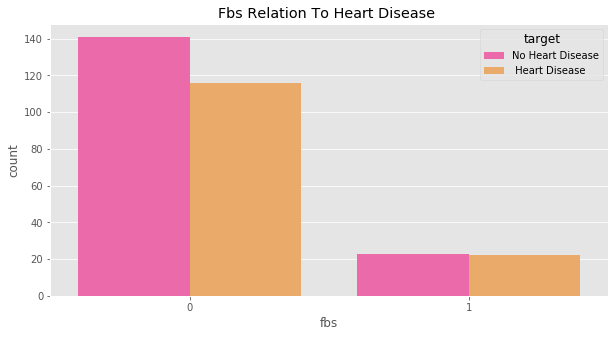

In [27]:
#break target out by blood sugar
plt.figure(figsize=(10,5))
sns.countplot(x="fbs",hue ="target",data=dup_data,palette = 'spring')
plt.title('Fbs Relation To Heart Disease ')

Most individuals did not have fasting blood sugar levels greater than 120 mg/dL. This did not change greatly when the data was divided based on the presence of disease although a slightly higher proportion of diseased patients exhibited higher levels of blood sugar.

thal  target          
0      Heart Disease        1
      No Heart Disease      1
1      Heart Disease       12
      No Heart Disease      6
2     No Heart Disease    129
       Heart Disease       36
3      Heart Disease       89
      No Heart Disease     28
Name: target, dtype: int64

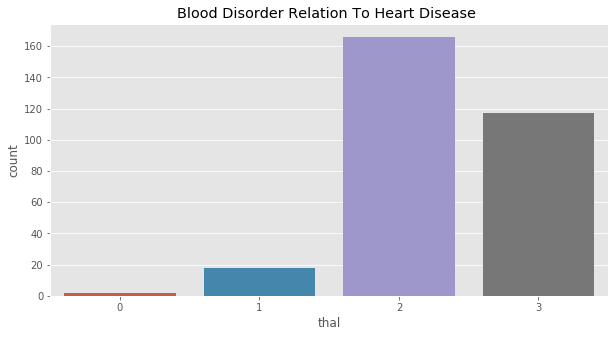

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x="thal", data=main_data)
plt.title('Blood Disorder Relation To Heart Disease ')
dup_data.groupby('thal')['target'].value_counts()

Patients diagnosed with a reversible β-Thalassemia defect were more prevelant in the cardiac disease cohort.This difference may contribute to the prediction of heart disease.

restecg  target          
0         Heart Disease      79
         No Heart Disease    68
1        No Heart Disease    95
          Heart Disease      56
2         Heart Disease       3
         No Heart Disease     1
Name: target, dtype: int64

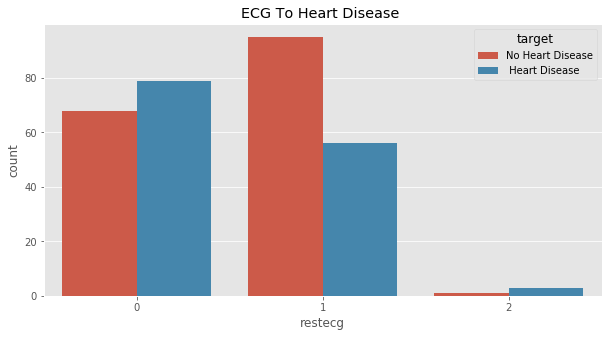

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="restecg",hue ="target",data=dup_data)
plt.title('ECG To Heart Disease ')
dup_data.groupby('restecg')['target'].value_counts()

Most patients exhibited normal resting electrocardiograhic results. However, a higher proportion of diseased patients had abnormal ST wave patterns suggesting that this feature may contribute some predictive power.

slope  target          
0       Heart Disease       12
       No Heart Disease      9
1       Heart Disease       91
       No Heart Disease     49
2      No Heart Disease    106
        Heart Disease       35
Name: target, dtype: int64

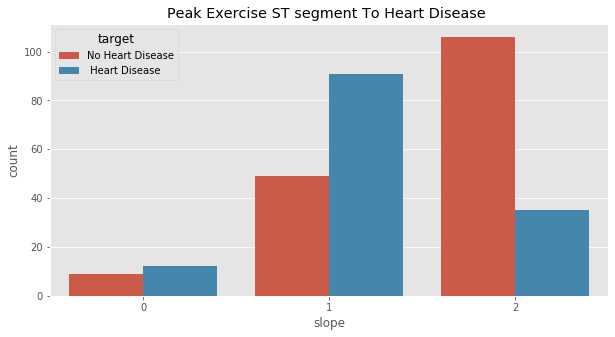

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="slope",hue ="target",data=dup_data)
plt.title('Peak Exercise ST segment To Heart Disease ')
dup_data.groupby('slope')['target'].value_counts()

The slope of the peak exercise ST segment differed between the non-disease and diseased cohorts with the majority of cardiac disease patients exhibiting a flat ST slope 

###### Conclusion from Data Analysis: 
14 predictor variables from the UCI heart disease dataset are used to predict the diagnosis of heart disease.

• Missing Values and Duplicate Values together make only .33% percent of the whole dataset.

• 75% of the dataset was used for this analysis as there were outliers in - Age, Blood Pressure, Cholesterol and maximum Heart Rate which combined to be 25% of the data.

• Exploration of the data indicated that patients - Age, Sex, Resting Blood Pressure, Serum Cholesterol, Fasting Blood Sugar, ECG results are useful features for predicting the presence of cardiac disease.

• Chest Pain, Maximum Heart Rate and Peak Exercise ST segment have maximum correlation to heart disease (also indicated by the heatmap).

Further we can use different machine learning techniques to make useful prediction about the output from existing data.